<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [428]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

## B. Load and understand the dataset

In [429]:
df = pd.read_excel("personality.xlsx")

In [430]:
df.drop(columns=['Name'], inplace= True)
df

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,0,1,1,44,0
1,1,1,1,683,0
2,1,1,1,873,0
3,0,1,1,1229,0
4,0,1,1,534,1
5,1,1,1,1779,1
6,1,1,1,2016,1
7,1,1,0,396,0
8,0,0,0,873,0
9,0,0,0,411,0


1. Display the summary of all the features of the dataset using `.info()`

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       54 non-null     int64
 1   Active in social media?      54 non-null     int64
 2   Replies to comments?         54 non-null     int64
 3   Number of friends/followers  54 non-null     int64
 4   Personality                  54 non-null     int64
dtypes: int64(5)
memory usage: 2.2 KB


2. Display the total number of samples from each label using `.value_counts()`

In [432]:
df.value_counts()

Post/Share Frequently?  Active in social media?  Replies to comments?  Number of friends/followers  Personality
0                       0                        0                     187                          0              1
                                                                       200                          0              1
                                                                       308                          0              1
                                                                       311                          1              1
                                                                       343                          0              1
                                                                       368                          1              1
                                                                       398                          0              1
                                                                     

In [433]:
df['Personality'].value_counts()

Personality
0    27
1    27
Name: count, dtype: int64

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [434]:
x = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [435]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [436]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43, 4)
(43,)
(11, 4)
(11,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [437]:
knn = KNeighborsClassifier(n_neighbors=10)

7. Train the model using the `.fit()`

In [438]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

8. Test the model using the `.predict()`

In [439]:
y_pred = knn.predict(x_test)

In [440]:
print(knn.predict([[0,1,0,1000]]))

[0]


## Evaluate the model

9. Create a confusion matrix

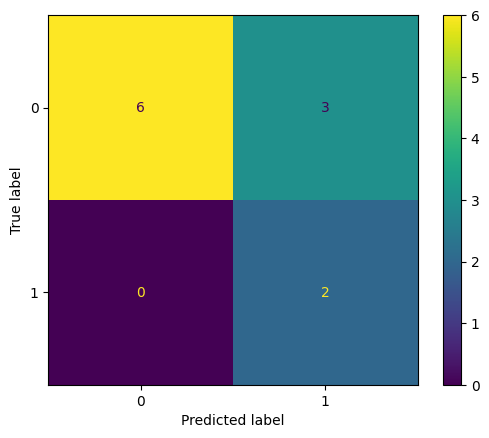

In [441]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [442]:
metrics.accuracy_score(y_test, y_pred)

0.7272727272727273

11. Display the precision

In [443]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.66666667 1.        ]


12. Display the recall

In [444]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.  0.4]


13. Display the f1-score

In [445]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.8        0.57142857]


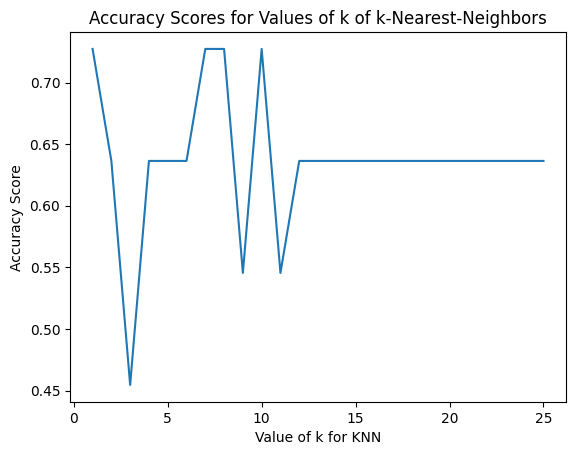

In [446]:
k_range = list(range(1,26))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(x_train, y_train)

    # Test the model
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()